2018년 6월 기준으로 수술 건수 급증 하다가 2019년 7월 쯤 다시 감소

story line: 2018년 6월 기준으로 급증할 수 있는 요인들 / 예시 - 새로운 수술 기법, 등등 요인

그래서 수술건수 급증했는데, 그 이후로 수술 건수 감당을 하지 못해서 하락한 것이 아닐까

2018년 전 후 차이 분석
- 통증정도 (한계: 주관적임) - 연속형
- 수술 실패 여부 - 범주형
- 통증기간 - 연속형

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 

mpl.rc('font',family='Malgun Gothic')


In [2]:
df1 = pd.read_csv('Medical_Image_Data_01.csv', encoding='cp949')
df2 = pd.read_csv('Patient_Diagnosis_Data.csv')
df3 = pd.read_csv('Patient_Surgery_Data.csv')
df1.isnull().sum()

환자ID                0
전방디스크높이(mm)         0
후방디스크높이(mm)         0
지방축적도               3
Instability         0
MF + ES             0
Modic change        0
PI                  4
PT                  4
Seg Angle(raw)      1
Vaccum disc         0
골밀도               896
디스크단면적              1
디스크위치               0
척추이동척도              0
척추전방위증              0
dtype: int64

In [3]:
import matplotlib.pyplot as plt
import matplotlib

plt.rc('font', family='NanumBarunGothic')
matplotlib.rc('axes',unicode_minus=False)

In [4]:
merge1 = pd.merge(df1, df2, on='환자ID', how='inner')
final = pd.merge(merge1, df3, on=['환자ID','연령', '입원일자', '신장', '체중', '퇴원일자', '헤모글로빈수치', '환자통증정도', '통증기간(월)'],how='inner')
final.columns

Index(['환자ID', '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'Large Lymphocyte',
       'Location of herniation', 'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수',
       '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환',
       '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '직업', '체중', '퇴원일자',
       '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법', '수술시간',
       '수술실패여부', '수술일자', '재발여부', '혈액형'],
      dtype='object')

In [5]:
final['수술일자(date)'] = pd.to_datetime(final['수술일자'], format='%Y%m%d')

### 재수술 여부 count

재발여부가 '1' 이면 1 아니면 '0' - 2018년, 2019년, (2020년-년도 대칭 아님)

In [6]:
_2019 = final[final['수술일자(date)'] >= '2019-01-01']

In [7]:
_2019_ = _2019[_2019['수술일자(date)'] < '2020-01-01']

In [8]:
_2019_.groupby('재발여부').count()

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,혈전합병증여부,환자통증정도,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,혈액형,수술일자(date)
재발여부,,,,,,,,,,,,,,,,,,,,,
0,669,669,669,667,669,669,669,667,667,669,...,669,669,669,669,643,669,669,669,669,669
1,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,95,102,102,102,102,102


In [9]:
_2018 = final[final['수술일자(date)'] >= '2018-01-01']

In [10]:
_2018_ = _2018[_2018['수술일자(date)'] < '2019-01-01']

In [11]:
_2018_.groupby('재발여부').count()

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,혈전합병증여부,환자통증정도,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,혈액형,수술일자(date)
재발여부,,,,,,,,,,,,,,,,,,,,,
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [12]:
_2020 = final[final['수술일자(date)'] >= '2020-01-01']

In [13]:
_2020_ = _2020[_2020['수술일자(date)'] < '2021-01-01']

In [14]:
_2020_.groupby('재발여부').count()

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,혈전합병증여부,환자통증정도,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,혈액형,수술일자(date)
재발여부,,,,,,,,,,,,,,,,,,,,,
0,163,163,163,163,163,163,163,163,163,163,...,163,163,163,163,159,163,163,163,163,163
1,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,18,19,19,19,19,19


In [15]:
_2017 = final[final['수술일자(date)'] >= '2017-01-01']

In [16]:
_2017_ = _2017[_2017['수술일자(date)'] < '2018-01-01']

In [17]:
_2017_.groupby('재발여부').count()

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,혈전합병증여부,환자통증정도,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,혈액형,수술일자(date)
재발여부,,,,,,,,,,,,,,,,,,,,,
0,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,33,65,65,65,65,65
1,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,6,13,13,13,13,13


수술 건수 => 변수 지정
- 2018년 5월 이전: before (0)
- 2018년 6월 이후: after (1)

In [18]:
final['b or a'] = np.where(final['수술일자(date)'] < '2018-06-30','before','after' )

In [19]:
final

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,재발여부,혈액형,수술일자(date),b or a
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,0,1.0,TELD,68.0,0,20190715,0,RH+A,2019-07-15,after
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,0,1.0,TELD,31.0,0,20190716,0,RH+A,2019-07-16,after
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,0,1.0,TELD,78.0,0,20190731,0,RH+B,2019-07-31,after
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,0,2.0,TELD,73.0,0,20190802,0,RH+O,2019-08-02,after
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,0,1.0,TELD,29.0,0,20190906,0,RH+A,2019-09-06,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,17.0,10.7,237.5,0,2795.7,2,59.5,23.0,21.8,...,0,12.0,NaN,80.0,0,20170407,0,RH+A,2017-04-07,before
1890,1891PT,9.4,8.2,288.0,0,1473.0,0,47.7,20.2,5.0,...,0,6.0,NaN,20.0,0,20170427,0,RH+B,2017-04-27,before
1891,1892PT,13.5,5.5,148.5,0,3864.1,0,44.6,15.0,17.4,...,0,1.0,IELD,50.0,0,20170411,0,RH+O,2017-04-11,before
1892,1893PT,14.0,10.0,89.0,0,2481.8,2,32.2,11.1,17.7,...,0,24.0,NaN,25.0,0,20170410,0,RH+A,2017-04-10,before


In [20]:
final['수술일자(date)']

0      2019-07-15
1      2019-07-16
2      2019-07-31
3      2019-08-02
4      2019-09-06
          ...    
1889   2017-04-07
1890   2017-04-27
1891   2017-04-11
1892   2017-04-10
1893   2017-04-12
Name: 수술일자(date), Length: 1894, dtype: datetime64[ns]

<AxesSubplot:xlabel='b or a', ylabel='count'>

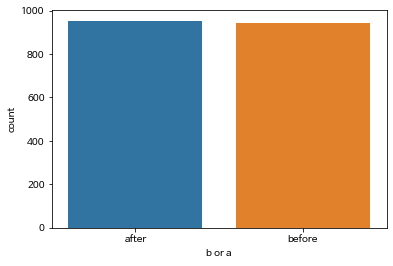

In [21]:
sns.countplot(x = final['b or a'])

In [22]:
final[final['b or a'] == 'after'].count()

환자ID                      953
전방디스크높이(mm)               953
후방디스크높이(mm)               953
지방축적도                     951
Instability               953
MF + ES                   953
Modic change              953
PI                        951
PT                        951
Seg Angle(raw)            953
Vaccum disc               953
골밀도                       953
디스크단면적                    953
디스크위치                     953
척추이동척도                    953
척추전방위증                    953
Large Lymphocyte          953
Location of herniation    953
ODI                       237
가족력                       953
간질성폐질환                    953
고혈압여부                     953
과거수술횟수                    953
당뇨여부                      953
말초동맥질환여부                  953
빈혈여부                      953
성별                        953
스테로이드치료                   953
신부전여부                     953
신장                        953
심혈관질환                     953
암발병여부                     953
연령                        953
우울증여부     

In [23]:
final[final['b or a'] == 'before'].count()

환자ID                      941
전방디스크높이(mm)               941
후방디스크높이(mm)               941
지방축적도                     940
Instability               941
MF + ES                   941
Modic change              941
PI                        939
PT                        939
Seg Angle(raw)            940
Vaccum disc               941
골밀도                        45
디스크단면적                    940
디스크위치                     941
척추이동척도                    941
척추전방위증                    941
Large Lymphocyte          941
Location of herniation    941
ODI                       225
가족력                       890
간질성폐질환                    941
고혈압여부                     941
과거수술횟수                    941
당뇨여부                      941
말초동맥질환여부                  941
빈혈여부                      941
성별                        941
스테로이드치료                   941
신부전여부                     941
신장                        941
심혈관질환                     941
암발병여부                     941
연령                        941
우울증여부     

2018년 전 후 차이 분석
- 통증정도 (한계: 주관적임) - 연속형
- 수술 실패 여부 - 범주형
- 통증기간 - 연속형

In [24]:
final

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,재발여부,혈액형,수술일자(date),b or a
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,0,1.0,TELD,68.0,0,20190715,0,RH+A,2019-07-15,after
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,0,1.0,TELD,31.0,0,20190716,0,RH+A,2019-07-16,after
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,0,1.0,TELD,78.0,0,20190731,0,RH+B,2019-07-31,after
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,0,2.0,TELD,73.0,0,20190802,0,RH+O,2019-08-02,after
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,0,1.0,TELD,29.0,0,20190906,0,RH+A,2019-09-06,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,17.0,10.7,237.5,0,2795.7,2,59.5,23.0,21.8,...,0,12.0,NaN,80.0,0,20170407,0,RH+A,2017-04-07,before
1890,1891PT,9.4,8.2,288.0,0,1473.0,0,47.7,20.2,5.0,...,0,6.0,NaN,20.0,0,20170427,0,RH+B,2017-04-27,before
1891,1892PT,13.5,5.5,148.5,0,3864.1,0,44.6,15.0,17.4,...,0,1.0,IELD,50.0,0,20170411,0,RH+O,2017-04-11,before
1892,1893PT,14.0,10.0,89.0,0,2481.8,2,32.2,11.1,17.7,...,0,24.0,NaN,25.0,0,20170410,0,RH+A,2017-04-10,before


In [25]:
final['환자통증정도'].unique

<bound method Series.unique of 0       10
1       10
2        7
3        7
4        7
        ..
1889     7
1890     7
1891     7
1892     7
1893     8
Name: 환자통증정도, Length: 1894, dtype: int64>

### 1) 통증정도 - 주관적

<AxesSubplot:xlabel='b or a', ylabel='환자통증정도'>

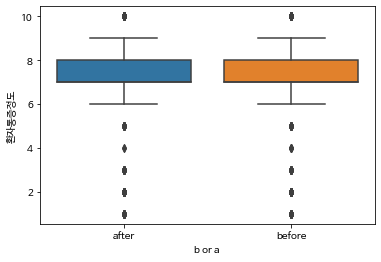

In [26]:
sns.boxplot(x = final['b or a'], y = final['환자통증정도'])

#### 정규성 검정

In [27]:
import scipy.stats as stats

In [28]:
# test_stat, p_val = stats.shapiro(final[

### 2) 통증기간 - 연속형

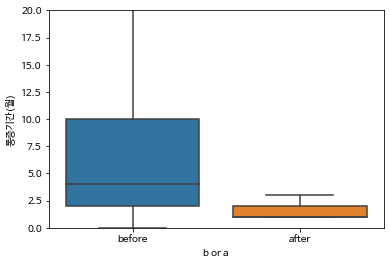

In [29]:
sns.boxplot(x = final['b or a'], y = final['통증기간(월)'], order=['before','after'])
plt.ylim(0,20)
plt.show()

연령별로 따로 뽑아볼까?

#### 정규성 검정

In [30]:
df1 = final.loc[:,['b or a', '통증기간(월)']]

In [31]:
df1 

,b or a,통증기간(월)
0,after,1.0
1,after,1.0
2,after,1.0
3,after,2.0
4,after,1.0
...,...,...
1889,before,12.0
1890,before,6.0
1891,before,1.0
1892,before,24.0


In [32]:
df_1 = df1[df1['b or a'] == 'before' ]

In [33]:
df_1

,b or a,통증기간(월)
953,before,12.0
954,before,7.0
955,before,0.2
956,before,1.0
957,before,7.0
...,...,...
1889,before,12.0
1890,before,6.0
1891,before,1.0
1892,before,24.0


In [34]:
df_1.isnull().sum()

b or a     0
통증기간(월)    4
dtype: int64

In [35]:
df_2 = df1.loc[df1['b or a'] == 'after' ]

In [36]:
df_2

,b or a,통증기간(월)
0,after,1.0
1,after,1.0
2,after,1.0
3,after,2.0
4,after,1.0
...,...,...
948,after,1.0
949,after,1.0
950,after,2.0
951,after,1.0


In [37]:
df_2.isnull().sum()

b or a     0
통증기간(월)    0
dtype: int64

In [38]:
import scipy.stats as stats

In [39]:
test_stat, p_val = stats.shapiro(list(df_1['통증기간(월)'].dropna()))
print("Test-statistics : {}, p-value : {}".format(test_stat, p_val))

Test-statistics : 0.37144768238067627, p-value : 0.0


In [40]:
test_stat, p_val = stats.shapiro(list(df_2['통증기간(월)'].dropna()))
print("Test-statistics : {}, p-value : {}".format(test_stat, p_val))

Test-statistics : 0.6206374168395996, p-value : 2.026978228645848e-41


정규성 검사 결고 정규성을 띄지 않는다.

#### Mannwhitney U Test

In [41]:
from scipy.stats import mannwhitneyu

results = mannwhitneyu(list(df_1['통증기간(월)']),list(df_2['통증기간(월)']))
results

MannwhitneyuResult(statistic=140435.0, pvalue=1.909617186336392e-161)

Mann-Whitney U Test
: 독립표본 T검정에 대응하는 비모수적 검정 방법.

두 집단 각각의 값들의 순위들을 합하여 순위합을 구하고, 그것의 차이가 통계적으로 유의한지 파악한다.

두 집단의 평균과 표준편차는 상관없기 대문에 정규분포를 다르지 않아도 검정이 가능

하지만 순위만 비교한 것이기 때문에 두 그룹의 크기의 차이를 언급할 수 없다는 단점이 존재

**가설**

귀무가설 H0 : 집단들의 평균값이 같다.

대립가설 H1 : 집단들의 평균값이 같지 않다.

#### 결론

p- value가 0.0으로 대립가설 H1 채택 : 집달들의 평균값이 같지 않다.

- before 와 after의 통증기간의 평균이 같지 않다.

### 3) 수술실패여부

In [42]:
import pandas as pd
from scipy.stats import chi2_contingency

In [43]:
df2 = final.loc[:,['b or a', '수술실패여부']]

In [44]:
df_1 = [df2['b or a'] == 'before']

In [45]:
df_2 = [df2['b or a'] == 'after']

In [46]:
pd.crosstab(final['b or a'], final['수술실패여부'])

수술실패여부,0,1
b or a,,
after,896,57
before,883,58


In [47]:
result = pd.crosstab(final['b or a'], final['수술실패여부'])
result

수술실패여부,0,1
b or a,,
after,896,57
before,883,58


#### 카이제곱

In [48]:
stats.chi2_contingency(observed = result)

(0.004914981003772943,
 0.9441085545119419,
 1,
 array([[895.13569166,  57.86430834],
        [883.86430834,  57.13569166]]))

- 귀무가설 : before/after와 수술실패여부 간에는 관련성이 없다.
- 대립가설 : before/after와 수술실패여부 간에는 관련성이 있다.

#### 결론

p-value가 0.94로 유의수준인 0.05 이상이므로 귀무가설 채택